In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. 

In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('adult.data', header = None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
df_train.columns = col_labels
df_train.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
nr_train = df_train.shape[0]
nr_train

32561

In [6]:
df_test = pd.read_csv('adult.test', skiprows=1, header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
df_test.columns = col_labels
df_test.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
nr_test = df_test.shape[0]
nr_test

16281

In [9]:
df = pd.concat([df_train, df_test], axis=0)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping columns that we don't need for our prediction
* For example we dont'need columns that have all unique values, columns that have all values the same, we may drop one column that may be the sum of 2 or more other columns etc.

In [12]:
# Dropping education column. Since we have education_num column, we don't need it.
df.drop("education", axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Looking at unique values of each column : checking that all columns have the right datatype,  Searching for strange values, Checking how are denoted missing values.

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [14]:
# Printing all categorical features (object datatype)
# Object datatypes must have only categorical/string values
for i in range(len(df.dtypes)):
    if df.dtypes[i] == "object":
        print(df.dtypes.index[i])

workclass
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [15]:
for col in df.columns:
    print(col + " : " + str(df[col].unique()))
    print()

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]

education_num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital_status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-re

* 
* As we see missing values are denoted with " ?". We must replace them with np.nan and then handle those missing values.
* In each categorical column with have some unnecessary spaces. We must remove them

* If we have cells or column names with spaces in between we should replace them with underscore if we want to draw a tree. <br>
df.replace(" ", "", regex=True, inplace=True)

In [16]:
# Removing the spaces in front and in the end of categorial features. In our case we have spaces only in front of the values.
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Handling missing values

In [17]:
df.isna().sum().values.any()

False

In [18]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [19]:
df.replace('?',np.NaN,inplace=True)

In [20]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [21]:
# We have missing values in categorical columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="constant", add_indicator=True)

In [22]:
df['workclass']=imputer.fit_transform(df[['workclass']])
df['occupation']=imputer.fit_transform(df[['occupation']])
df['native_country']=imputer.fit_transform(df[['native_country']])

In [23]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [24]:
X = df.drop("wage_class", axis=1).copy()
y = df["wage_class"].copy()

### Extracting a dataframe with categorical features and a dataframe with continuous features from X. Encode categorical features in X and y
* Transform multi-categorical features into numerical using one-hot encoding, encode binary categorical features using 0 and 1 and transform ordinal categorical features into numerical/discrete values.
* Scale the continuous features
* Concatenate these 2 dataframes

In [25]:
# Extracting the categorical columns.
cat_df = X.select_dtypes(include=['object']).copy()

In [26]:
cat_df.columns

Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country'],
      dtype='object')

In [27]:
cat_df.head()

,workclass,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
for col in cat_df.columns:
    print(col + " : " + str(cat_df[col].unique()))
    print()

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'missing_value' 'Self-emp-inc' 'Without-pay' 'Never-worked']

marital_status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'missing_value'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex : ['Male' 'Female']

native_country : ['United-States' 'Cuba' 'Jamaica' 'India' 'missing_value' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portuga

In [29]:
cat_df["sex"] = cat_df["sex"].map({"Male" : 1, "Female" : 0})

In [30]:
# Using the dummy encoding to encode the categorical columns to numericsl ones
for col in cat_df.drop(["sex"] ,axis=1).columns:
    x=cat_df[col].head(1)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [31]:
cat_df.head()

,sex,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing_value,marital_status_Married-AF-spouse,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,native_country_missing_value
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# extracting the numerical columns
num_df = X.select_dtypes(include=['int64']).copy()
num_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [33]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns, index=cat_df.index)

In [34]:
scaled_num_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087


In [35]:
# combining the Numerical and categorical dataframes to get the final dataset
X=pd.concat([scaled_num_df,cat_df], axis=1)
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,native_country_missing_value
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Encode y output variable
# Minority class = 1 , majority class = 0
y.value_counts() / len(y)

<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: wage_class, dtype: float64

In [38]:
y = y.map({"<=50K" : 0 , "<=50K." : 0 , ">50K" : 1, ">50K." : 1})

### Handling imbalanced data

In [40]:
y.value_counts() / len(y)

0    0.760718
1    0.239282
Name: wage_class, dtype: float64

(array([37155.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

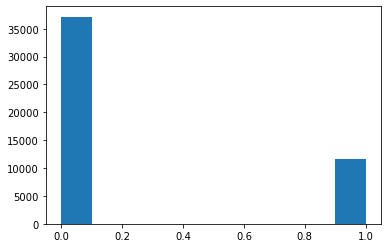

In [41]:
# Data is imbalanced
plt.hist(y)

In [45]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
X, y = sampler.fit_sample(X, y)

In [46]:
x_train = X[:nr_train]
y_train = y[:nr_train]
x_test = X[nr_train : len(df)]
y_test = y[nr_train : len(df)]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32561, 85)
(32561,)
(16281, 85)
(16281,)


In [47]:
x_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,native_country_missing_value
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
model = XGBClassifier(objective="binary:logistic", random_state=1)
model.fit(x_train, y_train)

# missing -> we tell XGBoost what character is used to represent missing values
# in general we use 0 as missing values because XGBoost does not allocate memory for zeros and we set missing=None
# early_stopping_rounds=10 -> if after building 10 trees the predictions dont improve, it will stop and will take the prediction of tree nr_trees - 10


XGBClassifier(random_state=1)

In [49]:
# Model Accuracy on TRAINING SET
pred_train = model.predict(x_train)
#pred_train = [round(x) for x in pred_train]
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     24720
           1       0.80      0.60      0.68      7841

    accuracy                           0.87     32561
   macro avg       0.84      0.77      0.80     32561
weighted avg       0.86      0.87      0.86     32561



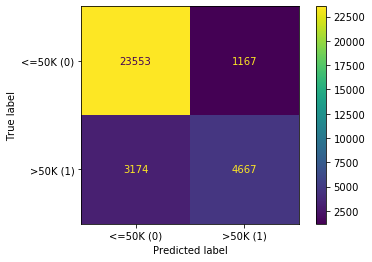

In [50]:
plot_confusion_matrix(model, x_train, y_train, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [51]:
recall_0 = (23649) / (23649 + 1071)  # RECALL (0)
precision_0 = (23649) / (23649 + 2150)   # PRECISION (0)

recall_1 = (5691) / (2150 + 5691)   # RECALL (1)
precision_1 = (5691) / (1071 + 5691)   # PRECISION (1)

print("RECALL (0) : ", recall_0)
print("PRECISION (0) : ", precision_0)

print("RECALL (1) : ", recall_1)
print("PRECISION (1) : ", precision_1)

RECALL (0) :  0.9566747572815534
PRECISION (0) :  0.9166634365673089
RECALL (1) :  0.7258002805764571
PRECISION (1) :  0.8416149068322981


In [52]:
# Model Accuracy on TEST SET
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.80      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.78      0.80     16281
weighted avg       0.86      0.87      0.86     16281



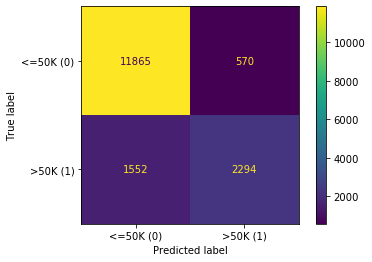

In [53]:
plot_confusion_matrix(model, x_test, y_test, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

 GridSearch with Cross Validation <br>
 We are going to have 2 rounds in order to prevent the long time it needs to find the best parameters and to get a better performance of our model. In 1.Round we set some parameters. Based on these parameters we set another parameters on 2.Round

In [54]:
# 1.Round
params = {"max_depth" : [3, 4, 5],
          "learning_rate" : [0.1, 0.01, 0.05],
          }

In [55]:
gridsearch = GridSearchCV(estimator=XGBClassifier(objective="binary:logistic", 
                                                  random_state=1, 
                                                  subsample=0.9, 
                                                  colsample_bytree=0.5), 
                          param_grid = params, scoring='roc_auc', verbose=0, n_jobs=10, cv=5)

gridsearch.fit(x_train, y_train, verbose=False, early_stopping_rounds=10, eval_metric="auc", eval_set=[(x_test, y_test)])

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.5, random_state=1,
                                     subsample=0.9),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5]},
             scoring='roc_auc')

In [56]:
print(gridsearch.best_params_)

{'learning_rate': 0.1, 'max_depth': 5}


* Since best learning rate is 0.1 (upper bound) we will try higher values to get the best learning rate.
* Since gamma is 1.0 (upper bound) we will try higher values to get the best gamma
* Since max_depth is 5 (upper bound) we will try higher values to get the best max_depth
* Since reg_lambda is 0 (lower bound) we are not going to try new values of it.
* Since scale_pos_weight is 3 (middle value) we are not going to try new values of it.


In [71]:
# # 2.Round

# params = {"max_depth" : [5, 6, 7],
#           "learning_rate" : [0.1, 0.2, 0.3],
#           "gamma" : [1.0, 1.1, 1.1],
#           "reg_lambda" : [0],
#           "scale_pos_weight" : [3]}


In [72]:
# gridsearch = GridSearchCV(estimator=XGBClassifier(objective="binary:logistic", 
#                                                   random_state=1, 
#                                                   subsample=0.9, 
#                                                   colsample_bytree=0.5), 
#                           param_grid = params, scoring='roc_auc', verbose=0, n_jobs=10, cv=5)

# gridsearch.fit(x_train, y_train, verbose=False, early_stopping_rounds=10, eval_metric="auc", eval_set=[(x_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, vali

In [73]:
# print(gridsearch.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 3}


In [58]:
model = XGBClassifier(objective="binary:logistic", 
                      random_state=1,
                      learning_rate = 0.1,
                      )

model.fit(x_train, y_train)

XGBClassifier(random_state=1)

In [59]:
# Model Accuracy on TRAINING SET
pred_train = model.predict(x_train)
#pred_train = [round(x) for x in pred_train]
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     24720
           1       0.80      0.60      0.68      7841

    accuracy                           0.87     32561
   macro avg       0.84      0.77      0.80     32561
weighted avg       0.86      0.87      0.86     32561



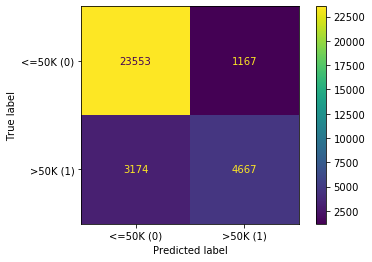

In [60]:
plot_confusion_matrix(model, x_train, y_train, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [61]:
# Model Accuracy on TEST SET
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.80      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.78      0.80     16281
weighted avg       0.86      0.87      0.86     16281



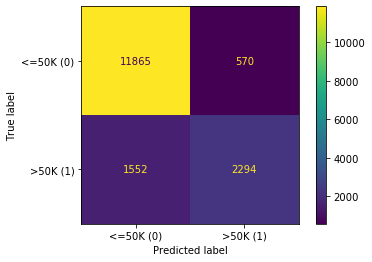

In [62]:
plot_confusion_matrix(model, x_test, y_test, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [63]:
import pickle
f1 = open("xgboost.pickle", "wb")
pickle.dump(model, f1)